In [1]:
%cd ..

d:\~Perso\Etudes\DAC\NeuralNetworksDIY


100%|██████████| 50/50 [00:00<00:00, 127.55it/s]


[0.25813857 0.15908032 0.12342124 0.10130078 0.08756259 0.07775089
 0.07040316 0.06470209 0.06014069 0.05639472 0.05325089 0.05056507
 0.04823681 0.0461939  0.04438294 0.04276343 0.04130404 0.03998009
 0.03877187 0.03766344 0.03664178 0.03569614 0.03481754 0.03399845
 0.03323246 0.03251411 0.03183868 0.03120208 0.03060077 0.03003161
 0.02949187 0.0289791  0.02849116 0.02802612 0.02758224 0.027158
 0.02675198 0.02636293 0.02598972 0.0256313  0.02528673 0.02495515
 0.02463579 0.02432791 0.02403085 0.02374401 0.02346682 0.02319877
 0.02293937 0.02268818]
1.0


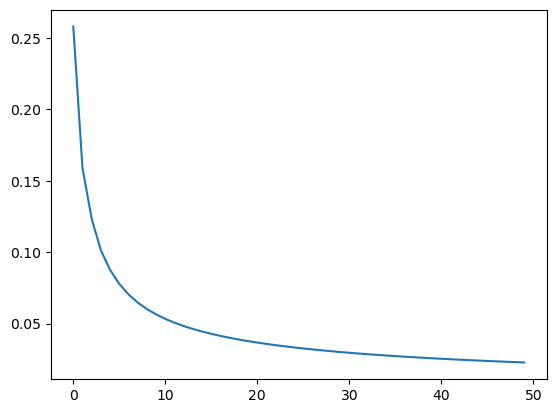

In [4]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from src.linear import Linear
from src.losses import *
from src.non_linear import TanH, Sigmoide, Softmax
from src.encapsulation import Sequential, Optim
np.random.seed(42)


batch_size = 8

X, y = load_digits(return_X_y=True, n_class=2)
y_oh = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

net = Sequential(
    Linear(64, 32),
    TanH(),
    Linear(32, 16),
    TanH(),
    Linear(16, 8),
    TanH(),
    Linear(8, 2),
    Sigmoide(),
    # Softmax(),
)

optimizer = Optim(net, CrossEntropyLoss(), eps=1e-2)
lossList = optimizer.SGD(X, y_oh, batch_size, 50)
print(lossList)
pd.Series(lossList).plot()
print(optimizer.score(X, y))
